<a href="https://colab.research.google.com/github/DanielEXT10/AI/blob/main/Decision_Tree_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Random Forest

Daniel Alfonso Garcia Perez

A Lo largo de esta actividad desarrollaremos 3 algoritmos diferentes para el caso de anlisis "Housing Prices", a partir de un dataset obtenido de la pagina de Kaggle. Los Algoritmos a implementar seran los siguientes:
* Decision Tree Regressor
* Random Forest Regression
* Decisioon Tree Clasification

Evaluaremos el desempeño de cada uno con el fin de seleccionar el que mejor se adapte a la solucion del problema.
Lo que se busca, es que el algoritmo sea capaz de pronosticar el valor de una casa a partir de una serie de caracteristicas dadas a partir de ladimensionalidad del dataset.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from math import sqrt

import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
h_train = pd.read_csv('/content/housing_train.csv')

In [ ]:
h_train.shape

(1460, 81)

Como podemos observar el dataset cuenta con 1460 filas y 81 columnas, por lo que sera necesario analizar cuales caracterizticas tienen mayor relevancia en la crecion de un pronostico.

In [ ]:
h_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

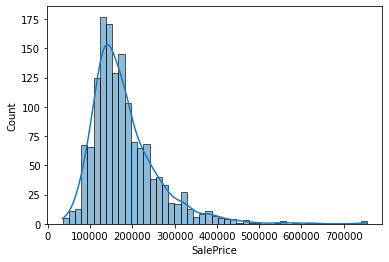

In [ ]:

sns.histplot(data=h_train, x="SalePrice", kde=True)

## Manejo de datos nulos

Dentro del proceso de limpieza de nuestro dataset uno de los paso mas importantes es el manejo de valores nulos. Dependiendo de las caracteristicas de estos y  la relevancia que tienen para el modelo decidiremos la manera correcto de trabajarlos.

In [ ]:
#h_train.info()

Lo primero que revisaremos es que columnas contienen datos vacios y que porcentaje representan estos, del total de registros.

In [ ]:
dataNull = h_train.isnull().sum()
[dataNull[dataNull > 0] / h_train.shape[0]]

[LotFrontage     0.177397
 Alley           0.937671
 MasVnrType      0.005479
 MasVnrArea      0.005479
 BsmtQual        0.025342
 BsmtCond        0.025342
 BsmtExposure    0.026027
 BsmtFinType1    0.025342
 BsmtFinType2    0.026027
 Electrical      0.000685
 FireplaceQu     0.472603
 GarageType      0.055479
 GarageYrBlt     0.055479
 GarageFinish    0.055479
 GarageQual      0.055479
 GarageCond      0.055479
 PoolQC          0.995205
 Fence           0.807534
 MiscFeature     0.963014
 dtype: float64]

A partir de lo observado en el paso anterior reduciremos la dimensionalidad de nuestro dataset, en base a aquellas columnas que contienen mas del 80% de valores nulos.

In [ ]:
feature_cols = [ 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition','SalePrice']

In [ ]:
train_df = h_train[feature_cols]

## Segmentacion de variables numericas y categóricas.

### Variables numéricas

Antes de proseguir con la limpieza separaremos las columnas numericas de las categoricas.

In [ ]:
number_cols = list(train_df.select_dtypes(include = 'number').columns)

In [ ]:
numeric_null = h_train[number_cols].isnull().sum()
numeric_null[numeric_null > 0]


LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

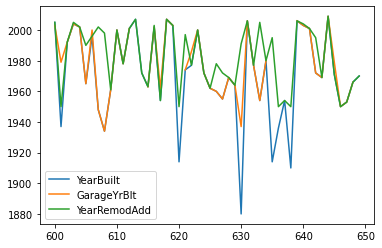

In [ ]:
h_train[['YearBuilt','GarageYrBlt', 'YearRemodAdd']].iloc[600:650].plot()

Debido a la redundancia de informacion de las columnas que aun presentan valores nulos, se decide retirarlas.

In [ ]:
numeric_train_df = h_train[number_cols].dropna(axis=1)

In [ ]:
numeric_train_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000


### Variables Categóricas

In [ ]:
categoric_train_df = train_df.select_dtypes(exclude = 'number')

In [ ]:
categoric_cols = list(categoric_train_df.columns)

In [ ]:
categoric_null = categoric_train_df.isnull().sum()
categoric_null[categoric_null > 0]

MasVnrType        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

Para eliminar los valores nulos rellenaremos utilizando la moda de cada columna categórica.

In [ ]:
for col in categoric_train_df.columns:
  categoric_train_df[col].fillna(categoric_train_df[col].mode()[0], inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
# Output Cleaned due to report size

categoric_null = categoric_train_df.isnull().sum()
categoric_null[categoric_null > 0]

Series([], dtype: int64)

### Consolidacion de los datos

Unimos los dataframes que obtuvimos numerico y categorico.

In [ ]:
housing_train_df = pd.concat([numeric_train_df , categoric_train_df], axis = 1)

In [ ]:
housing_train_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,706,0,150,856,...,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,9600,6,8,1976,1976,978,0,284,1262,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,11250,7,5,2001,2002,486,0,434,920,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,9550,7,5,1915,1970,216,0,540,756,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,14260,8,5,2000,2000,655,0,490,1145,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


### Transformacion de variables categóricas a numéricas.

In [ ]:
from sklearn.preprocessing import LabelEncoder


### Multi Column Label Encoder

In [ ]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Transformamos las variables categoricas  numericas

In [ ]:
housing_train_df_final = MultiColumnLabelEncoder(columns = categoric_cols).fit_transform(housing_train_df)

In [ ]:
housing_train_df_final.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,706,0,150,856,...,2,6,2,1,1,4,4,2,8,4
1,20,9600,6,8,1976,1976,978,0,284,1262,...,3,6,4,1,1,4,4,2,8,4
2,60,11250,7,5,2001,2002,486,0,434,920,...,2,6,4,1,1,4,4,2,8,4
3,70,9550,7,5,1915,1970,216,0,540,756,...,2,6,2,5,2,4,4,2,8,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,2,6,4,1,1,4,4,2,8,4


## Regresion

### Decision Tree Regressor

In [ ]:
df_cols =list(housing_train_df_final.columns)

In [ ]:
x_col = df_cols
x_col.remove('SalePrice')

In [ ]:
regresor = DecisionTreeRegressor(random_state=0,max_depth=3)

In [ ]:
x =housing_train_df_final[x_col]
y = housing_train_df_final['SalePrice']

In [ ]:
regresor.fit(x,y)

DecisionTreeRegressor(max_depth=3, random_state=0)

In [ ]:
y_predict = regresor.predict(x)

In [ ]:
sqrt(mean_squared_error(y,y_predict))

40142.374455005935

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
randomf = RandomForestRegressor()
randomf.fit(x,y)
forecast = randomf.predict(x)

In [ ]:
forecast

array([207236.79, 174415.37, 221771.  , ..., 260202.84, 136706.59,
       148622.5 ])

In [ ]:
sqrt(mean_squared_error(y,forecast))

11164.375901452315



## Clasificacion


A continuacion agregaremos una columna adicional al dataframe, con las categorias establecidas en el planteamiento del problema, el cual se basara en rangos de precios.

In [ ]:
#Creamos las categorias para la clasificacion
conditions = [
    (housing_train_df_final['SalePrice'] <= 100000),
    (housing_train_df_final['SalePrice'] >= 100000) & (housing_train_df_final['SalePrice'] <= 500000),
    (housing_train_df_final['SalePrice'] > 500000)

]
#lista de valores que adoptara dependiendo de la condicion que se cumpla
values = ['Plow','Pmedium','Phigh']

housing_train_df_final['CatPrice'] = np.select(conditions, values)

In [ ]:
housing_train_df_final.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,CatPrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,6,2,1,1,4,4,2,8,4,Pmedium
1,20,9600,6,8,1976,1976,978,0,284,1262,...,6,4,1,1,4,4,2,8,4,Pmedium
2,60,11250,7,5,2001,2002,486,0,434,920,...,6,4,1,1,4,4,2,8,4,Pmedium
3,70,9550,7,5,1915,1970,216,0,540,756,...,6,2,5,2,4,4,2,8,0,Pmedium
4,60,14260,8,5,2000,2000,655,0,490,1145,...,6,4,1,1,4,4,2,8,4,Pmedium


In [ ]:
xtrain = x
ytrain = housing_train_df_final['CatPrice']

In [ ]:
arbol = DecisionTreeClassifier()

In [ ]:
arbol.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
arbol.score(xtrain,ytrain)

1.0

In [ ]:
export_graphviz(arbol, out_file= 'arbol.dot',class_names= values, feature_names= list(x.columns), impurity=False, filled = True)

In [ ]:
with open('/content/arbol.dot') as f:
  dot_graph = f.read()
houseTree = graphviz.Source(dot_graph)

In [ ]:
houseTree.render()

'Source.gv.pdf'

In [ ]:
Treefeatures = list(x.columns)

In [ ]:
caract =len(Treefeatures)

In [ ]:
featureImportance = arbol.feature_importances_

### Extraemos las Caracteristicas mas importantes del dataset con el fin de hacer una reduccion de dimensionalidad

In [ ]:
d =dict(zip(Treefeatures,featureImportance))

In [ ]:
importancedf = pd.DataFrame.from_dict(d, orient = 'index', columns= ['Importance'])

In [ ]:
importancedf =importancedf.sort_values(by='Importance',ascending=False).head(10)

In [ ]:
impFeatures = list(importancedf.index)

In [ ]:
range(len(importancedf))

range(0, 10)

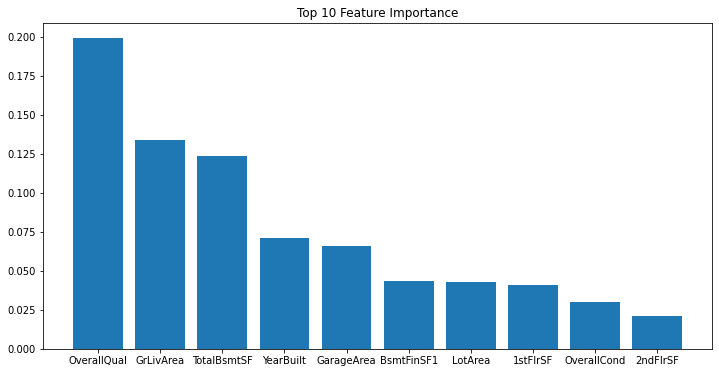

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(range(10),importancedf['Importance'])
plt.xticks(np.arange(10),impFeatures)
plt.title('Top 10 Features Importance')
plt.show()

## Conclusion

Tras haber aplicado ambos algoritmos Decision Tree y Random Forest podemos destacar varios aspectos importantes:
* Los arboles de decision son una solucion altamente explicable, permiten al desarrollador asi como a su cliente final entender la logica detras de los resultados obtenidos. Sin embargo es suceptible al sobre ajuste(Over fitting) cuando se consideran multiples caracteristicas, como podemos observar en el arbol que generamos en el problema de classificacion, en ocasiones se consideran parametros que no llegan a tener una importancia relevante para el resultado. lo mas recomendable seria realizar primero una reduccion de dimensiones. Se realizaron pruebas de RFE (Recursive Feature Elimination) se plantea la posibilidad de agregar ese paso para despues trbajar con los algoritmos.

* Random Forest, surge como una alternativa o evolucion de los arboles de decision, consiste en un conjunto aleatorio de decision trees que trabajan de forma independiente, y crean nodos a partir de un subconjunto de las caracteristicas con las que contamos, los resultados finalmente son evaluados y se extrae aquel que haya obtenido un mayor desempeño.

Finalmente es importante recalcar la importancia que tiene la limpieza de datos en el desarrollo de los algoritmos de machine learning, la calidad de nuestro dataset repercute directamente en la calidad de nuestro algoritmo, llegando incluso a ser incapaz de funcionar si nuestra informacion no se encuentra de manera correcta (Manejo de datos nulos y variables categoricas).

## Bibliografia

Sánchez Stahlschmidt, P. L. (n.d.). MACHINE LEARNING 2022 Y REDES NEURONALES CON PYTHON DE CERO. Udemy. Retrieved February 14, 2022, from https://www.udemy.com/course/mlmasterclass/

Yiu, T. (2021, December 10). Understanding Random Forest - Towards Data Science. Medium. Retrieved March 21, 2022, from https://towardsdatascience.com/understanding-random-forest-58381e0602d2#:%7E:text=The%20random%20forest%20is%20a,that%20of%20any%20individual%20tree.

## Apendix A Decision Tree for Classification